# Transfermarkt Transfers

**Disclaimers** : 
- The analysis scope is based on the dataset, especially on the defined transfer date range. Some info and numbers may differ from the real complete data out there.
- Some data may be missing because of scraping issue or restricted by the transfermarkt themselves. These could causing an innacurate conclusions.

The dataset was politely scraped from [transfermarkt.com](https://www.transfermarkt.com/statistik/transfertage) using Scrapy and Splash. The notebook will be updated as the scraping goes from time to time. Check the `Transfer Date Range` section below to find out the oldest and latest date.

## Preparation

### Import Libraries

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys
import datetime
from IPython.core.interactiveshell import InteractiveShell

pd.set_option('display.max_columns', None)
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

print("python version: ", sys.version)
print("pandas version: ", pd.__version__)
print("seaborn version: ", sns.__version__)

print("last run: ", datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


python version:  3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas version:  1.1.3
seaborn version:  0.11.0
last run:  2021-11-11 13:21:22


### Loading Dataset

In [42]:
df = pd.read_csv("transfermarkt-transfer.csv")

# developer-friendly column names and format
df.columns = [x.lower().replace('-', '_').replace(' ', '_') for x in df.columns.to_list()]

df.sample(5, random_state=1)

,player_id,name,age,position,national_1,national_2,left_club,left_club_league,joined_club,joined_club_league,transfer_date,transfer_date_p,market_value,market_value_p,fee,left_club_country,joined_club_country,loan_fee,loan_fee_p,created_at,updated_at
4388,432094.0,Shemmy Mayembe,22.0,Right-Back,Zambia,NaN,ZESCO United FC,NaN,FK Minaj,Premier Liga,"Sep 16, 2020",2020-09-16,€50Th.,50000,?,Zambia,Ukraine,NaN,NaN,2021-10-04 16:40:00,2021-10-04 16:40:00
37911,512051.0,Héctor Urdíroz,28.0,Central Midfield,Spain,NaN,Burladés,NaN,Beti Kozkor,NaN,"Aug 1, 2020",2020-08-01,€100Th.,100000,free transfer,Spain,Spain,NaN,NaN,2021-10-04 17:11:09,2021-10-04 17:11:09
21780,650865.0,Fabian Monge,19.0,Defensive Midfield,Australia,NaN,Western Sydney,A-League,Sydney Olympic,NPL New South Wales,"Jan 22, 2021",2021-01-22,€50Th.,50000,?,Australia,Australia,NaN,NaN,2021-11-02 11:43:06,2021-11-02 11:43:06
9270,176133.0,Hernán Santana,30.0,Central Midfield,Spain,NaN,Sporting Gijón,LaLiga2,Mumbai City,Indian Super League,"Oct 25, 2020",2020-10-25,€325Th.,325000,loan transfer,Spain,India,NaN,NaN,2021-10-04 16:05:34,2021-10-04 16:05:34
7460,387601.0,Giuseppe Stancampiano,33.0,Goalkeeper,Italy,NaN,Trapani,NaN,Without Club,NaN,"Oct 6, 2020",2020-10-06,€50Th.,50000,-,Italy,NaN,NaN,NaN,2021-10-04 16:14:26,2021-10-04 16:14:26


## Dataset Information & Description

### Data Sample

In [43]:
df.sample(5, random_state=1)

,player_id,name,age,position,national_1,national_2,left_club,left_club_league,joined_club,joined_club_league,transfer_date,transfer_date_p,market_value,market_value_p,fee,left_club_country,joined_club_country,loan_fee,loan_fee_p,created_at,updated_at
4388,432094.0,Shemmy Mayembe,22.0,Right-Back,Zambia,NaN,ZESCO United FC,NaN,FK Minaj,Premier Liga,"Sep 16, 2020",2020-09-16,€50Th.,50000,?,Zambia,Ukraine,NaN,NaN,2021-10-04 16:40:00,2021-10-04 16:40:00
37911,512051.0,Héctor Urdíroz,28.0,Central Midfield,Spain,NaN,Burladés,NaN,Beti Kozkor,NaN,"Aug 1, 2020",2020-08-01,€100Th.,100000,free transfer,Spain,Spain,NaN,NaN,2021-10-04 17:11:09,2021-10-04 17:11:09
21780,650865.0,Fabian Monge,19.0,Defensive Midfield,Australia,NaN,Western Sydney,A-League,Sydney Olympic,NPL New South Wales,"Jan 22, 2021",2021-01-22,€50Th.,50000,?,Australia,Australia,NaN,NaN,2021-11-02 11:43:06,2021-11-02 11:43:06
9270,176133.0,Hernán Santana,30.0,Central Midfield,Spain,NaN,Sporting Gijón,LaLiga2,Mumbai City,Indian Super League,"Oct 25, 2020",2020-10-25,€325Th.,325000,loan transfer,Spain,India,NaN,NaN,2021-10-04 16:05:34,2021-10-04 16:05:34
7460,387601.0,Giuseppe Stancampiano,33.0,Goalkeeper,Italy,NaN,Trapani,NaN,Without Club,NaN,"Oct 6, 2020",2020-10-06,€50Th.,50000,-,Italy,NaN,NaN,NaN,2021-10-04 16:14:26,2021-10-04 16:14:26


### Columns Description

| Column | Description | Data Type |
| --- | ----------- | ------- |
| player_id | The player's ID in transfermarkt site | categorical - unique |
| name | The player's name | categorical - nominal |
| age | The player's age | numerical - discrete |
| position | The player's position | categorical - nominal |
| national_1 | The player's nationality | categorical - nominal |
| national_2 | The player's other nationality | categorical - nominal |
| left_club | the player's former club | categorical - nominal |
| left_club_league | the player's former club league | categorical - nominal |
| left_club_country | the player's former club country | categorical - nominal |
| join_club | the player's new club | categorical - nominal |
| join_club_league | the player's new club league | categorical - nominal |
| join_club_country | the player's new club country | categorical - nominal |
| transfer_date | the transfer date | categorical - nominal |
| transfer_date_p | the transfer date (parsed) | categorical - date |
| market_value | the player's market value | categorical - nominal |
| market_value_p | the player's market value (parsed) | numerical - discrete |
| fee | - | categorical - nominal |
| loan_fee | - | categorical - nominal |
| loan_fee_p | - | numerical - discrete |
| created_at | the time data created (scraped) | categorical - datetime |
| updated_at | the time data edited (after scraped) | categorical - datetime |


### Data Information

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39265 entries, 0 to 39264
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            38212 non-null  float64
 1   name                 39265 non-null  object 
 2   age                  39043 non-null  float64
 3   position             39265 non-null  object 
 4   national_1           39264 non-null  object 
 5   national_2           6124 non-null   object 
 6   left_club            38309 non-null  object 
 7   left_club_league     28517 non-null  object 
 8   joined_club          37818 non-null  object 
 9   joined_club_league   27624 non-null  object 
 10  transfer_date        39265 non-null  object 
 11  transfer_date_p      39265 non-null  object 
 12  market_value         39265 non-null  object 
 13  market_value_p       39265 non-null  int64  
 14  fee                  39264 non-null  object 
 15  left_club_country    36136 non-null 

### Transfers Date Range

In [45]:
print(f"from {df.sort_values(['transfer_date_p']).iloc[[0, -1]].values[0, 10]} to {df.sort_values(['transfer_date_p']).iloc[[0, -1]].values[1, 10]}")

from Jul 4, 2020 to Feb 5, 2021


## Preprocessing

### Remove Unnecessary Features

In [46]:
df.drop(['market_value', 'transfer_date', 'created_at', 'updated_at'], axis=1, inplace=True)

### Remove Duplication

In [47]:
print("duplicated count before removal:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("duplicated count after removal:", df.duplicated().sum())


duplicated count before removal: 598
duplicated count after removal: 0


## Exploratory Data Analysis

### Descriptive Statistics

#### Numerical

In [48]:
df.select_dtypes(include='number').describe()


,player_id,age,market_value_p,loan_fee_p
count,37814.000000,38445.000000,3.866700e+04,2.000000e+02
mean,349023.177738,25.515724,3.969222e+05,9.327850e+05
std,194659.288844,4.683011,1.804850e+06,1.903830e+06
min,532.000000,15.000000,1.000000e+04,2.000000e+03
25%,190173.500000,22.000000,5.000000e+04,1.000000e+05
50%,340892.500000,25.000000,1.000000e+05,4.500000e+05
75%,499494.500000,29.000000,2.500000e+05,1.000000e+06
max,860256.000000,45.000000,8.100000e+07,2.000000e+07


#### Categorical

In [49]:
df.select_dtypes(exclude='number').describe()


,name,position,national_1,national_2,left_club,left_club_league,joined_club,joined_club_league,transfer_date_p,fee,left_club_country,joined_club_country,loan_fee
count,38667,38667,38666,6036,37901,28010,37418,27106,38667,38666,35560,35036,200
unique,33766,16,202,171,6442,316,6878,334,217,366,159,160,74
top,Juninho,Centre-Forward,Italy,Italy,Without Club,Premier League,Without Club,Premier League,2020-08-01,free transfer,Italy,Italy,€500Th.
freq,10,6201,3727,764,2839,815,2806,650,2062,19572,4146,4228,21


### Univariate Analysis

In [50]:
pass

### Multivariate Analysis

In [51]:
pass

### Insights

#### Most Valueable Player Nationality by Transfers Activities

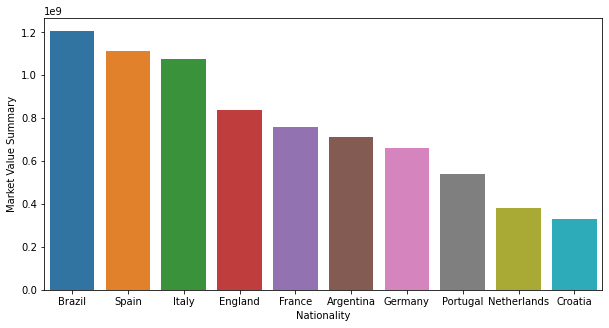

In [52]:
idf = df.groupby('national_1').agg({'market_value_p': 'sum'}).sort_values('market_value_p', ascending=False).reset_index().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='national_1', y='market_value_p', data=idf)
plt.ylabel('Market Value Summary')
plt.xlabel('Nationality')
plt.show();

#### Most Valueable League by Player Transfers

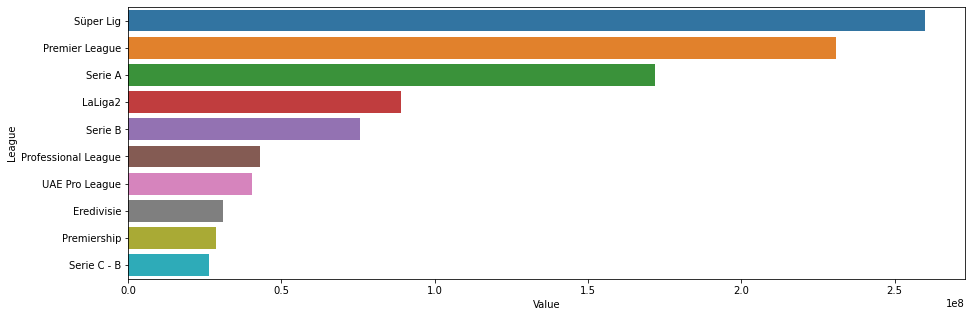

In [53]:
idfl = df.groupby('left_club_league').agg({'market_value_p': 'sum'}).sort_values('market_value_p', ascending=False).reset_index()
idfl = idfl.rename(columns={'left_club_league': 'league','market_value_p': 'out_value'})

idfr = df.groupby('joined_club_league').agg({'market_value_p': 'sum'}).sort_values('market_value_p', ascending=False).reset_index()
idfr = idfr.rename(columns={'joined_club_league': 'league', 'market_value_p': 'in_value'})

idf = idfl.merge(idfr, on='league')
idf['diff_value'] = idf['in_value'] - idf['out_value']
idf = idf.sort_values(['diff_value'], ascending=False).head(10)

plt.figure(figsize=(15, 5))
sns.barplot(x='diff_value', y='league', data=idf)
plt.ylabel('League')
plt.xlabel('Value')
plt.show();


#### Most Valueable Club by Player Transfers

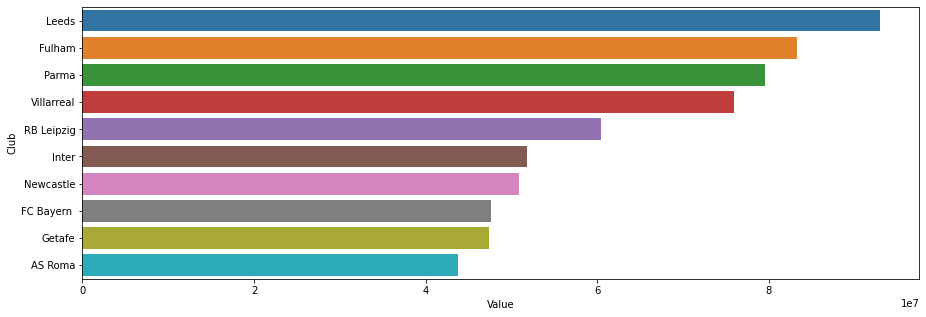

In [54]:
idfl = df.groupby('left_club').agg({'market_value_p': 'sum'}).sort_values('market_value_p', ascending=False).reset_index()
idfl = idfl.rename(columns={'left_club': 'club','market_value_p': 'out_value'})
idfl

idfr = df.groupby('joined_club').agg({'market_value_p': 'sum'}).sort_values('market_value_p', ascending=False).reset_index()
idfr = idfr.rename(columns={'joined_club': 'club', 'market_value_p': 'in_value'})
idfr

idf = idfl.merge(idfr, on='club')
idf['diff_value'] = idf['in_value'] - idf['out_value']
idf = idf.sort_values(['diff_value'], ascending=False).head(10)
idf

plt.figure(figsize=(15, 5))
sns.barplot(x='diff_value', y='club', data=idf)
plt.ylabel('Club')
plt.xlabel('Value')
plt.show();


#### Most Valueable Country by Player Transfers

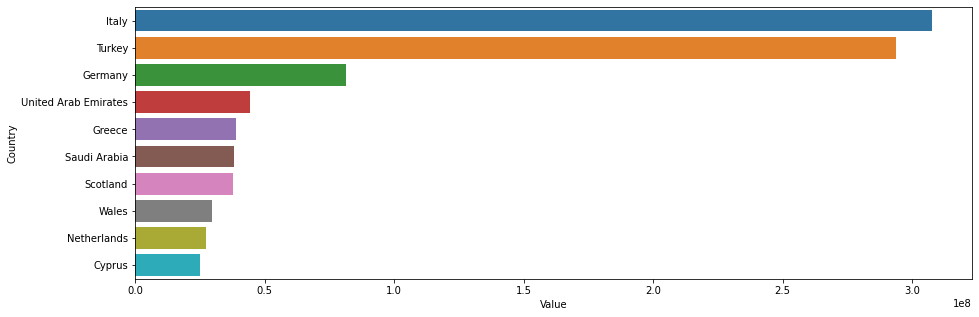

In [55]:
idfl = df.groupby('left_club_country').agg({'market_value_p': 'sum'}).sort_values('market_value_p', ascending=False).reset_index()
idfl = idfl.rename(columns={'left_club_country': 'country','market_value_p': 'out_value'})
idfl

idfr = df.groupby('joined_club_country').agg({'market_value_p': 'sum'}).sort_values('market_value_p', ascending=False).reset_index()
idfr = idfr.rename(columns={'joined_club_country': 'country', 'market_value_p': 'in_value'})
idfr

idf = idfl.merge(idfr, on='country')
idf['diff_value'] = idf['in_value'] - idf['out_value']
idf = idf.sort_values(['diff_value'], ascending=False).head(10)
idf

plt.figure(figsize=(15, 5))
sns.barplot(x='diff_value', y='country', data=idf)
plt.ylabel('Country')
plt.xlabel('Value')
plt.show();


#### Top Transfers

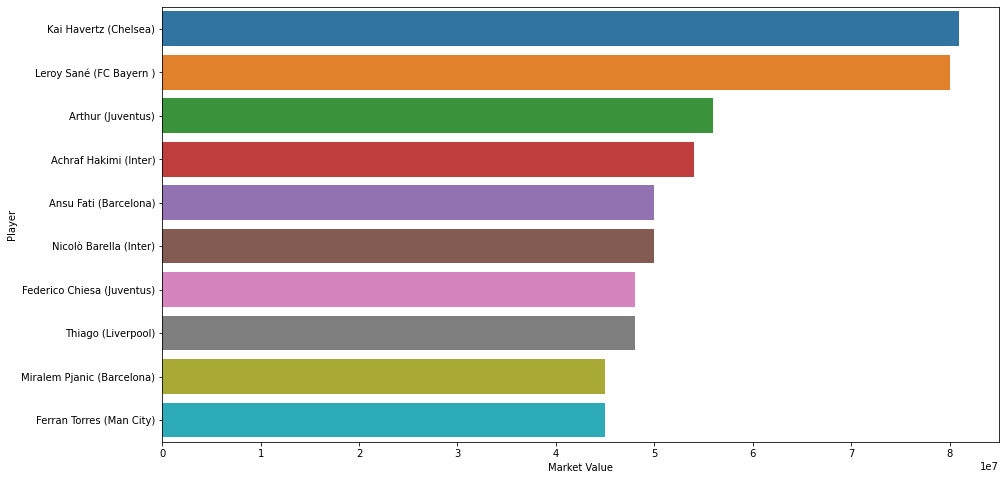

In [56]:
# TODO
idf = df.sort_values('market_value_p', ascending=False).head(10)
idf['name_club'] = idf['name'] + " (" + idf['joined_club'] + ")"

plt.figure(figsize=(15, 8))
sns.barplot(x='market_value_p', y='name_club', data=idf)
plt.ylabel('Player')
plt.xlabel('Market Value')
plt.show();
